In [451]:
import requests
import codecs

df=pd.read_excel('crawl_util/xls/main.xlsx')
exists_or_not=[]
for code in tqdm.tqdm(df.code.tolist()):
    response = requests.get('http://dbt.io/library/book?key=f03a423aad95120f8eb40005070f19e9&dam_id=AAKWBT&v=2')
    if (response.status_code==200) and not response.content==b'[]':
        exists_or_not.append(True)
        FileUtility.ensure_dir('API_res/'+code+'/')
        F=codecs.open('API_res/'+code+'/books.txt','w','utf-8')
        F.write(response.content.decode("utf-8"))
    else:
        exists_or_not.append(False)

files=FileUtility.recursive_glob('/mounts/data/proj/asgari/final_proj/1000langs/API_res/','*books.txt')

for file in tqdm.tqdm(files):
    code=file.replace('/books.txt','').split('/')[-1]
    json_data = json.loads(codecs.open(file,'r','utf-8').read())
    dam_ids=set()
    for x in json_data:
        dam_ids.add(x['dam_id'])
    for x in dam_ids:
        response = requests.get('http://dbt.io/library/verse?key=f03a423aad95120f8eb40005070f19e9&dam_id='+x+'2ET&v=2')
        FileUtility.ensure_dir('API_res/'+code+'/')
        F=codecs.open('API_res/'+code+'/content.txt','w','utf-8')
        F.write(response.content.decode("utf-8"))











  0%|          | 0/3393 [00:00<?, ?it/s]









  0%|          | 1/3393 [00:00<12:07,  4.66it/s]









  0%|          | 2/3393 [00:00<12:04,  4.68it/s]









  0%|          | 3/3393 [00:00<11:49,  4.78it/s]









  0%|          | 4/3393 [00:00<11:52,  4.76it/s]









  0%|          | 5/3393 [00:01<11:54,  4.74it/s]









  0%|          | 6/3393 [00:01<11:47,  4.78it/s]









  0%|          | 7/3393 [00:01<11:45,  4.80it/s]









  0%|          | 8/3393 [00:01<11:45,  4.80it/s]









  0%|          | 9/3393 [00:01<11:42,  4.82it/s]









  0%|          | 10/3393 [00:02<11:42,  4.81it/s]









  0%|          | 11/3393 [00:02<11:43,  4.81it/s]









  0%|          | 12/3393 [00:02<11:40,  4.83it/s]









  0%|          | 13/3393 [00:02<11:44,  4.80it/s]









  0%|          | 14/3393 [00:02<11:47,  4.78it/s]









  0%|          | 15/3393 [00:03<11:47,  4.77it/s]









  0%|          | 16/3393 [00:03<11:50,  4.76it/s]









  1%|

  5%|▌         | 183/3393 [00:45<13:14,  4.04it/s]









  5%|▌         | 184/3393 [00:45<13:13,  4.04it/s]









  5%|▌         | 185/3393 [00:45<13:13,  4.05it/s]









  5%|▌         | 186/3393 [00:45<13:11,  4.05it/s]









  6%|▌         | 187/3393 [00:46<13:13,  4.04it/s]









  6%|▌         | 188/3393 [00:46<13:13,  4.04it/s]









  6%|▌         | 189/3393 [00:46<13:12,  4.04it/s]









  6%|▌         | 190/3393 [00:46<13:11,  4.05it/s]









  6%|▌         | 191/3393 [00:47<13:10,  4.05it/s]









  6%|▌         | 192/3393 [00:47<13:12,  4.04it/s]









  6%|▌         | 193/3393 [00:47<13:11,  4.04it/s]









  6%|▌         | 194/3393 [00:48<13:14,  4.03it/s]









  6%|▌         | 195/3393 [00:48<13:13,  4.03it/s]









  6%|▌         | 196/3393 [00:48<13:14,  4.02it/s]









  6%|▌         | 197/3393 [00:48<13:14,  4.02it/s]









  6%|▌         | 198/3393 [00:49<13:13,  4.03it/s]









  6%|▌         | 199/3393 [00:49<13:15, 

 11%|█         | 365/3393 [01:36<13:22,  3.77it/s]









 11%|█         | 366/3393 [01:37<13:23,  3.77it/s]









 11%|█         | 367/3393 [01:37<13:22,  3.77it/s]









 11%|█         | 368/3393 [01:37<13:22,  3.77it/s]









 11%|█         | 369/3393 [01:37<13:22,  3.77it/s]









 11%|█         | 370/3393 [01:38<13:23,  3.76it/s]









 11%|█         | 371/3393 [01:38<13:24,  3.76it/s]









 11%|█         | 372/3393 [01:38<13:23,  3.76it/s]









 11%|█         | 373/3393 [01:39<13:22,  3.76it/s]









 11%|█         | 374/3393 [01:39<13:22,  3.76it/s]









 11%|█         | 375/3393 [01:39<13:21,  3.77it/s]









 11%|█         | 376/3393 [01:39<13:20,  3.77it/s]









 11%|█         | 377/3393 [01:40<13:21,  3.76it/s]









 11%|█         | 378/3393 [01:40<13:21,  3.76it/s]









 11%|█         | 379/3393 [01:40<13:22,  3.76it/s]









 11%|█         | 380/3393 [01:41<13:21,  3.76it/s]









 11%|█         | 381/3393 [01:41<13:21, 

 16%|█▌        | 547/3393 [02:36<13:32,  3.50it/s]









 16%|█▌        | 548/3393 [02:36<13:32,  3.50it/s]









 16%|█▌        | 549/3393 [02:36<13:31,  3.50it/s]









 16%|█▌        | 550/3393 [02:36<13:31,  3.51it/s]









 16%|█▌        | 551/3393 [02:37<13:31,  3.50it/s]









 16%|█▋        | 552/3393 [02:37<13:30,  3.51it/s]









 16%|█▋        | 553/3393 [02:37<13:30,  3.50it/s]









 16%|█▋        | 554/3393 [02:38<13:30,  3.50it/s]









 16%|█▋        | 555/3393 [02:38<13:32,  3.49it/s]









 16%|█▋        | 556/3393 [02:39<13:32,  3.49it/s]









 16%|█▋        | 557/3393 [02:39<13:32,  3.49it/s]









 16%|█▋        | 558/3393 [02:39<13:32,  3.49it/s]









 16%|█▋        | 559/3393 [02:40<13:31,  3.49it/s]









 17%|█▋        | 560/3393 [02:40<13:31,  3.49it/s]









 17%|█▋        | 561/3393 [02:40<13:30,  3.49it/s]









 17%|█▋        | 562/3393 [02:40<13:30,  3.49it/s]









 17%|█▋        | 563/3393 [02:41<13:31, 

 21%|██▏       | 729/3393 [03:33<12:59,  3.42it/s]









 22%|██▏       | 730/3393 [03:33<12:58,  3.42it/s]









 22%|██▏       | 731/3393 [03:34<13:00,  3.41it/s]









 22%|██▏       | 732/3393 [03:34<12:59,  3.41it/s]









 22%|██▏       | 733/3393 [03:34<12:59,  3.41it/s]









 22%|██▏       | 734/3393 [03:35<12:59,  3.41it/s]









 22%|██▏       | 735/3393 [03:35<12:59,  3.41it/s]









 22%|██▏       | 736/3393 [03:35<12:58,  3.41it/s]









 22%|██▏       | 737/3393 [03:35<12:58,  3.41it/s]









 22%|██▏       | 738/3393 [03:36<12:58,  3.41it/s]









 22%|██▏       | 739/3393 [03:36<12:58,  3.41it/s]









 22%|██▏       | 740/3393 [03:37<12:58,  3.41it/s]









 22%|██▏       | 741/3393 [03:37<12:58,  3.41it/s]









 22%|██▏       | 742/3393 [03:37<12:58,  3.41it/s]









 22%|██▏       | 743/3393 [03:38<12:58,  3.40it/s]









 22%|██▏       | 744/3393 [03:38<12:58,  3.40it/s]









 22%|██▏       | 745/3393 [03:39<12:58, 

 27%|██▋       | 911/3393 [04:30<12:15,  3.37it/s]









 27%|██▋       | 912/3393 [04:30<12:15,  3.37it/s]









 27%|██▋       | 913/3393 [04:30<12:15,  3.37it/s]









 27%|██▋       | 914/3393 [04:30<12:14,  3.37it/s]









 27%|██▋       | 915/3393 [04:31<12:14,  3.37it/s]









 27%|██▋       | 916/3393 [04:31<12:14,  3.37it/s]









 27%|██▋       | 917/3393 [04:31<12:13,  3.38it/s]









 27%|██▋       | 918/3393 [04:31<12:13,  3.38it/s]









 27%|██▋       | 919/3393 [04:32<12:12,  3.38it/s]









 27%|██▋       | 920/3393 [04:32<12:12,  3.38it/s]









 27%|██▋       | 921/3393 [04:32<12:11,  3.38it/s]









 27%|██▋       | 922/3393 [04:33<12:11,  3.38it/s]









 27%|██▋       | 923/3393 [04:33<12:11,  3.38it/s]









 27%|██▋       | 924/3393 [04:33<12:11,  3.38it/s]









 27%|██▋       | 925/3393 [04:33<12:10,  3.38it/s]









 27%|██▋       | 926/3393 [04:34<12:10,  3.38it/s]









 27%|██▋       | 927/3393 [04:34<12:10, 

 32%|███▏      | 1092/3393 [05:22<11:19,  3.39it/s]









 32%|███▏      | 1093/3393 [05:22<11:18,  3.39it/s]









 32%|███▏      | 1094/3393 [05:22<11:18,  3.39it/s]









 32%|███▏      | 1095/3393 [05:22<11:17,  3.39it/s]









 32%|███▏      | 1096/3393 [05:23<11:17,  3.39it/s]









 32%|███▏      | 1097/3393 [05:23<11:16,  3.39it/s]









 32%|███▏      | 1098/3393 [05:23<11:16,  3.39it/s]









 32%|███▏      | 1099/3393 [05:23<11:15,  3.39it/s]









 32%|███▏      | 1100/3393 [05:24<11:15,  3.39it/s]









 32%|███▏      | 1101/3393 [05:24<11:15,  3.39it/s]









 32%|███▏      | 1102/3393 [05:24<11:14,  3.39it/s]









 33%|███▎      | 1103/3393 [05:24<11:14,  3.39it/s]









 33%|███▎      | 1104/3393 [05:25<11:14,  3.40it/s]









 33%|███▎      | 1105/3393 [05:25<11:13,  3.40it/s]









 33%|███▎      | 1106/3393 [05:25<11:13,  3.40it/s]









 33%|███▎      | 1107/3393 [05:26<11:13,  3.39it/s]









 33%|███▎      | 1108/33

 37%|███▋      | 1272/3393 [06:14<10:24,  3.40it/s]









 38%|███▊      | 1273/3393 [06:14<10:24,  3.40it/s]









 38%|███▊      | 1274/3393 [06:15<10:23,  3.40it/s]









 38%|███▊      | 1275/3393 [06:15<10:23,  3.40it/s]









 38%|███▊      | 1276/3393 [06:15<10:23,  3.40it/s]









 38%|███▊      | 1277/3393 [06:16<10:23,  3.40it/s]









 38%|███▊      | 1278/3393 [06:16<10:22,  3.40it/s]









 38%|███▊      | 1279/3393 [06:16<10:22,  3.40it/s]









 38%|███▊      | 1280/3393 [06:16<10:22,  3.40it/s]









 38%|███▊      | 1281/3393 [06:17<10:21,  3.40it/s]









 38%|███▊      | 1282/3393 [06:17<10:21,  3.40it/s]









 38%|███▊      | 1283/3393 [06:17<10:21,  3.40it/s]









 38%|███▊      | 1284/3393 [06:17<10:20,  3.40it/s]









 38%|███▊      | 1285/3393 [06:18<10:20,  3.40it/s]









 38%|███▊      | 1286/3393 [06:18<10:19,  3.40it/s]









 38%|███▊      | 1287/3393 [06:18<10:19,  3.40it/s]









 38%|███▊      | 1288/33

 43%|████▎     | 1452/3393 [07:06<09:30,  3.40it/s]









 43%|████▎     | 1453/3393 [07:07<09:30,  3.40it/s]









 43%|████▎     | 1454/3393 [07:07<09:29,  3.40it/s]









 43%|████▎     | 1455/3393 [07:07<09:29,  3.40it/s]









 43%|████▎     | 1456/3393 [07:07<09:29,  3.40it/s]









 43%|████▎     | 1457/3393 [07:08<09:28,  3.40it/s]









 43%|████▎     | 1458/3393 [07:08<09:28,  3.40it/s]









 43%|████▎     | 1459/3393 [07:08<09:28,  3.40it/s]









 43%|████▎     | 1460/3393 [07:08<09:27,  3.40it/s]









 43%|████▎     | 1461/3393 [07:09<09:27,  3.40it/s]









 43%|████▎     | 1462/3393 [07:09<09:27,  3.40it/s]









 43%|████▎     | 1463/3393 [07:09<09:26,  3.40it/s]









 43%|████▎     | 1464/3393 [07:10<09:26,  3.40it/s]









 43%|████▎     | 1465/3393 [07:10<09:26,  3.40it/s]









 43%|████▎     | 1466/3393 [07:10<09:26,  3.40it/s]









 43%|████▎     | 1467/3393 [07:11<09:25,  3.40it/s]









 43%|████▎     | 1468/33

 48%|████▊     | 1632/3393 [08:02<08:40,  3.38it/s]









 48%|████▊     | 1633/3393 [08:02<08:40,  3.38it/s]









 48%|████▊     | 1634/3393 [08:03<08:40,  3.38it/s]









 48%|████▊     | 1635/3393 [08:03<08:39,  3.38it/s]









 48%|████▊     | 1636/3393 [08:04<08:39,  3.38it/s]









 48%|████▊     | 1637/3393 [08:04<08:39,  3.38it/s]









 48%|████▊     | 1638/3393 [08:04<08:39,  3.38it/s]









 48%|████▊     | 1639/3393 [08:04<08:38,  3.38it/s]









 48%|████▊     | 1640/3393 [08:05<08:38,  3.38it/s]









 48%|████▊     | 1641/3393 [08:05<08:38,  3.38it/s]









 48%|████▊     | 1642/3393 [08:05<08:37,  3.38it/s]









 48%|████▊     | 1643/3393 [08:05<08:37,  3.38it/s]









 48%|████▊     | 1644/3393 [08:06<08:37,  3.38it/s]









 48%|████▊     | 1645/3393 [08:06<08:37,  3.38it/s]









 49%|████▊     | 1646/3393 [08:06<08:36,  3.38it/s]









 49%|████▊     | 1647/3393 [08:07<08:36,  3.38it/s]









 49%|████▊     | 1648/33

 53%|█████▎    | 1812/3393 [08:56<07:48,  3.37it/s]









 53%|█████▎    | 1813/3393 [08:57<07:48,  3.37it/s]









 53%|█████▎    | 1814/3393 [08:57<07:47,  3.37it/s]









 53%|█████▎    | 1815/3393 [08:57<07:47,  3.37it/s]









 54%|█████▎    | 1816/3393 [08:58<07:47,  3.37it/s]









 54%|█████▎    | 1817/3393 [08:58<07:47,  3.37it/s]









 54%|█████▎    | 1818/3393 [08:58<07:46,  3.37it/s]









 54%|█████▎    | 1819/3393 [08:59<07:46,  3.37it/s]









 54%|█████▎    | 1820/3393 [08:59<07:46,  3.37it/s]









 54%|█████▎    | 1821/3393 [08:59<07:46,  3.37it/s]









 54%|█████▎    | 1822/3393 [09:00<07:45,  3.37it/s]









 54%|█████▎    | 1823/3393 [09:00<07:45,  3.37it/s]









 54%|█████▍    | 1824/3393 [09:00<07:45,  3.37it/s]









 54%|█████▍    | 1825/3393 [09:01<07:45,  3.37it/s]









 54%|█████▍    | 1826/3393 [09:04<07:47,  3.36it/s]









 54%|█████▍    | 1827/3393 [09:04<07:46,  3.35it/s]









 54%|█████▍    | 1828/33

 59%|█████▊    | 1992/3393 [10:16<07:13,  3.23it/s]









 59%|█████▊    | 1993/3393 [10:16<07:13,  3.23it/s]









 59%|█████▉    | 1994/3393 [10:16<07:12,  3.23it/s]









 59%|█████▉    | 1995/3393 [10:17<07:12,  3.23it/s]









 59%|█████▉    | 1996/3393 [10:17<07:12,  3.23it/s]









 59%|█████▉    | 1997/3393 [10:18<07:12,  3.23it/s]









 59%|█████▉    | 1998/3393 [10:18<07:11,  3.23it/s]









 59%|█████▉    | 1999/3393 [10:18<07:11,  3.23it/s]









 59%|█████▉    | 2000/3393 [10:19<07:11,  3.23it/s]









 59%|█████▉    | 2001/3393 [10:19<07:10,  3.23it/s]









 59%|█████▉    | 2002/3393 [10:20<07:10,  3.23it/s]









 59%|█████▉    | 2003/3393 [10:20<07:10,  3.23it/s]









 59%|█████▉    | 2004/3393 [10:20<07:10,  3.23it/s]









 59%|█████▉    | 2005/3393 [10:21<07:09,  3.23it/s]









 59%|█████▉    | 2006/3393 [10:21<07:09,  3.23it/s]









 59%|█████▉    | 2007/3393 [10:22<07:09,  3.22it/s]









 59%|█████▉    | 2008/33

 64%|██████▍   | 2172/3393 [11:33<06:29,  3.13it/s]









 64%|██████▍   | 2173/3393 [11:33<06:29,  3.13it/s]









 64%|██████▍   | 2174/3393 [11:34<06:29,  3.13it/s]









 64%|██████▍   | 2175/3393 [11:34<06:29,  3.13it/s]









 64%|██████▍   | 2176/3393 [11:35<06:28,  3.13it/s]









 64%|██████▍   | 2177/3393 [11:35<06:28,  3.13it/s]









 64%|██████▍   | 2178/3393 [11:35<06:28,  3.13it/s]









 64%|██████▍   | 2179/3393 [11:36<06:27,  3.13it/s]









 64%|██████▍   | 2180/3393 [11:36<06:27,  3.13it/s]









 64%|██████▍   | 2181/3393 [11:37<06:27,  3.13it/s]









 64%|██████▍   | 2182/3393 [11:37<06:27,  3.13it/s]









 64%|██████▍   | 2183/3393 [11:37<06:26,  3.13it/s]









 64%|██████▍   | 2184/3393 [11:38<06:26,  3.13it/s]









 64%|██████▍   | 2185/3393 [11:38<06:26,  3.13it/s]









 64%|██████▍   | 2186/3393 [11:38<06:25,  3.13it/s]









 64%|██████▍   | 2187/3393 [11:39<06:25,  3.13it/s]









 64%|██████▍   | 2188/33

 69%|██████▉   | 2352/3393 [12:50<05:41,  3.05it/s]









 69%|██████▉   | 2353/3393 [12:51<05:40,  3.05it/s]









 69%|██████▉   | 2354/3393 [12:51<05:40,  3.05it/s]









 69%|██████▉   | 2355/3393 [12:51<05:40,  3.05it/s]









 69%|██████▉   | 2356/3393 [12:52<05:39,  3.05it/s]









 69%|██████▉   | 2357/3393 [12:52<05:39,  3.05it/s]









 69%|██████▉   | 2358/3393 [12:53<05:39,  3.05it/s]









 70%|██████▉   | 2359/3393 [12:53<05:39,  3.05it/s]









 70%|██████▉   | 2360/3393 [12:53<05:38,  3.05it/s]









 70%|██████▉   | 2361/3393 [12:54<05:38,  3.05it/s]









 70%|██████▉   | 2362/3393 [12:54<05:38,  3.05it/s]









 70%|██████▉   | 2363/3393 [12:55<05:37,  3.05it/s]









 70%|██████▉   | 2364/3393 [12:55<05:37,  3.05it/s]









 70%|██████▉   | 2365/3393 [12:55<05:37,  3.05it/s]









 70%|██████▉   | 2366/3393 [12:56<05:36,  3.05it/s]









 70%|██████▉   | 2367/3393 [12:56<05:36,  3.05it/s]









 70%|██████▉   | 2368/33

 75%|███████▍  | 2532/3393 [14:07<04:48,  2.99it/s]









 75%|███████▍  | 2533/3393 [14:07<04:47,  2.99it/s]









 75%|███████▍  | 2534/3393 [14:08<04:47,  2.99it/s]









 75%|███████▍  | 2535/3393 [14:08<04:47,  2.99it/s]









 75%|███████▍  | 2536/3393 [14:09<04:46,  2.99it/s]









 75%|███████▍  | 2537/3393 [14:09<04:46,  2.99it/s]









 75%|███████▍  | 2538/3393 [14:09<04:46,  2.99it/s]









 75%|███████▍  | 2539/3393 [14:10<04:45,  2.99it/s]









 75%|███████▍  | 2540/3393 [14:10<04:45,  2.99it/s]









 75%|███████▍  | 2541/3393 [14:10<04:45,  2.99it/s]









 75%|███████▍  | 2542/3393 [14:11<04:45,  2.99it/s]









 75%|███████▍  | 2543/3393 [14:11<04:44,  2.99it/s]









 75%|███████▍  | 2544/3393 [14:12<04:44,  2.98it/s]









 75%|███████▌  | 2545/3393 [14:12<04:44,  2.98it/s]









 75%|███████▌  | 2546/3393 [14:13<04:43,  2.98it/s]









 75%|███████▌  | 2547/3393 [14:13<04:43,  2.98it/s]









 75%|███████▌  | 2548/33

 80%|███████▉  | 2712/3393 [15:28<03:53,  2.92it/s]









 80%|███████▉  | 2713/3393 [15:28<03:52,  2.92it/s]









 80%|███████▉  | 2714/3393 [15:29<03:52,  2.92it/s]









 80%|████████  | 2715/3393 [15:29<03:52,  2.92it/s]









 80%|████████  | 2716/3393 [15:29<03:51,  2.92it/s]









 80%|████████  | 2717/3393 [15:30<03:51,  2.92it/s]









 80%|████████  | 2718/3393 [15:30<03:51,  2.92it/s]









 80%|████████  | 2719/3393 [15:30<03:50,  2.92it/s]









 80%|████████  | 2720/3393 [15:31<03:50,  2.92it/s]









 80%|████████  | 2721/3393 [15:31<03:50,  2.92it/s]









 80%|████████  | 2722/3393 [15:32<03:49,  2.92it/s]









 80%|████████  | 2723/3393 [15:32<03:49,  2.92it/s]









 80%|████████  | 2724/3393 [15:33<03:49,  2.92it/s]









 80%|████████  | 2725/3393 [15:33<03:48,  2.92it/s]









 80%|████████  | 2726/3393 [15:34<03:48,  2.92it/s]









 80%|████████  | 2727/3393 [15:34<03:48,  2.92it/s]









 80%|████████  | 2728/33

 85%|████████▌ | 2892/3393 [16:46<02:54,  2.87it/s]









 85%|████████▌ | 2893/3393 [16:46<02:53,  2.87it/s]









 85%|████████▌ | 2894/3393 [16:46<02:53,  2.87it/s]









 85%|████████▌ | 2895/3393 [16:47<02:53,  2.87it/s]









 85%|████████▌ | 2896/3393 [16:47<02:52,  2.87it/s]









 85%|████████▌ | 2897/3393 [16:48<02:52,  2.87it/s]









 85%|████████▌ | 2898/3393 [16:48<02:52,  2.87it/s]









 85%|████████▌ | 2899/3393 [16:48<02:51,  2.87it/s]









 85%|████████▌ | 2900/3393 [16:49<02:51,  2.87it/s]









 85%|████████▌ | 2901/3393 [16:49<02:51,  2.87it/s]









 86%|████████▌ | 2902/3393 [16:52<02:51,  2.87it/s]









 86%|████████▌ | 2903/3393 [16:52<02:50,  2.87it/s]









 86%|████████▌ | 2904/3393 [16:53<02:50,  2.87it/s]









 86%|████████▌ | 2905/3393 [16:53<02:50,  2.87it/s]









 86%|████████▌ | 2906/3393 [16:53<02:49,  2.87it/s]









 86%|████████▌ | 2907/3393 [16:54<02:49,  2.87it/s]









 86%|████████▌ | 2908/33

 91%|█████████ | 3072/3393 [18:11<01:54,  2.81it/s]









 91%|█████████ | 3073/3393 [18:12<01:53,  2.81it/s]









 91%|█████████ | 3074/3393 [18:12<01:53,  2.81it/s]









 91%|█████████ | 3075/3393 [18:13<01:53,  2.81it/s]









 91%|█████████ | 3076/3393 [18:13<01:52,  2.81it/s]









 91%|█████████ | 3077/3393 [18:13<01:52,  2.81it/s]









 91%|█████████ | 3078/3393 [18:14<01:52,  2.81it/s]









 91%|█████████ | 3079/3393 [18:14<01:51,  2.81it/s]









 91%|█████████ | 3080/3393 [18:15<01:51,  2.81it/s]









 91%|█████████ | 3081/3393 [18:15<01:50,  2.81it/s]









 91%|█████████ | 3082/3393 [18:16<01:50,  2.81it/s]









 91%|█████████ | 3083/3393 [18:16<01:50,  2.81it/s]









 91%|█████████ | 3084/3393 [18:16<01:49,  2.81it/s]









 91%|█████████ | 3085/3393 [18:17<01:49,  2.81it/s]









 91%|█████████ | 3086/3393 [18:17<01:49,  2.81it/s]









 91%|█████████ | 3087/3393 [18:17<01:48,  2.81it/s]









 91%|█████████ | 3088/33

 96%|█████████▌| 3252/3393 [19:34<00:50,  2.77it/s]









 96%|█████████▌| 3253/3393 [19:35<00:50,  2.77it/s]









 96%|█████████▌| 3254/3393 [19:35<00:50,  2.77it/s]









 96%|█████████▌| 3255/3393 [19:35<00:49,  2.77it/s]









 96%|█████████▌| 3256/3393 [19:41<00:49,  2.76it/s]









 96%|█████████▌| 3257/3393 [19:41<00:49,  2.76it/s]









 96%|█████████▌| 3258/3393 [19:42<00:48,  2.76it/s]









 96%|█████████▌| 3259/3393 [19:42<00:48,  2.76it/s]









 96%|█████████▌| 3260/3393 [19:43<00:48,  2.76it/s]









 96%|█████████▌| 3261/3393 [19:43<00:47,  2.76it/s]









 96%|█████████▌| 3262/3393 [19:43<00:47,  2.76it/s]









 96%|█████████▌| 3263/3393 [19:45<00:47,  2.75it/s]









 96%|█████████▌| 3264/3393 [19:45<00:46,  2.75it/s]









 96%|█████████▌| 3265/3393 [19:45<00:46,  2.75it/s]









 96%|█████████▋| 3266/3393 [19:46<00:46,  2.75it/s]









 96%|█████████▋| 3267/3393 [19:46<00:45,  2.75it/s]









 96%|█████████▋| 3268/33

In [15]:
import requests
import codecs
F=codecs.open('temp.txt','w','utf-8')
response = requests.get('http://dbt.io/library/book?key=f03a423aad95120f8eb40005070f19e9&dam_id=APDASV&v=2')
if (response.status_code==200) and not response.content==b'[]':
    F.write(response.content.decode("utf-8"))
F.close()

In [14]:

import json
import collections
bookmetafile='temp.txt'
bible=dict()
code=bookmetafile.split('/')[-1].split('_')[0]
json_data = json.loads(codecs.open(bookmetafile,'r','utf-8').read())

dam_ids=set()
for x in json_data:
    dam_ids.add(x['dam_id'])
print(dam_ids)



JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [11]:

dam_ids=['APDASVN2ET']

bible=dict()
for x in dam_ids:
    response = requests.get('http://dbt.io/library/verse?key=f03a423aad95120f8eb40005070f19e9&dam_id='+x+'&v=2')
    book=json.loads(response.content.decode("utf-8"))
    print(book[0:100])
    for rec in book:
        bible[self.book_map[rec['book_id']]+rec['chapter_id'].zfill(3)+rec['verse_id'].zfill(3)]=rec['verse_text'].strip()

ordered_bible = collections.OrderedDict(sorted(bible.items()))
bible=['\t'.join([k,v]) for k,v in ordered_bible.items()]
       

[{'Title': 'Resource Not Found'}, {'Message': 'The API version requested is not currently supported.'}]


KeyError: 'verse_text'

In [7]:
bible

[]

In [452]:
files=FileUtility.recursive_glob('/mounts/data/proj/asgari/final_proj/1000langs/API_res/','*books.txt')

In [453]:
for file in tqdm.tqdm(files):
    code=file.replace('/books.txt','').split('/')[-1]
    json_data = json.loads(codecs.open(file,'r','utf-8').read())
    dam_ids=set()
    for x in json_data:
        dam_ids.add(x['dam_id'])
    for x in dam_ids:
        response = requests.get('http://dbt.io/library/verse?key=f03a423aad95120f8eb40005070f19e9&dam_id='+x+'2ET&v=2')
        FileUtility.ensure_dir('API_res/'+code+'/')
        F=codecs.open('API_res/'+code+'/content.txt','w','utf-8')
        F.write(response.content.decode("utf-8"))











  0%|          | 0/1144 [00:00<?, ?it/s]









  0%|          | 1/1144 [00:11<3:41:32, 11.63s/it]









  0%|          | 2/1144 [00:13<2:11:00,  6.88s/it]









  0%|          | 3/1144 [00:14<1:31:44,  4.82s/it]









  0%|          | 4/1144 [00:16<1:18:51,  4.15s/it]









  0%|          | 5/1144 [00:18<1:11:38,  3.77s/it]









  1%|          | 6/1144 [00:20<1:06:20,  3.50s/it]









  1%|          | 7/1144 [00:23<1:02:20,  3.29s/it]









  1%|          | 8/1144 [00:23<55:27,  2.93s/it]  









  1%|          | 9/1144 [00:25<53:41,  2.84s/it]









  1%|          | 10/1144 [00:27<52:54,  2.80s/it]









  1%|          | 11/1144 [00:31<53:20,  2.82s/it]









  1%|          | 12/1144 [00:32<51:50,  2.75s/it]









  1%|          | 13/1144 [00:33<48:23,  2.57s/it]









  1%|          | 14/1144 [00:35<47:35,  2.53s/it]









  1%|▏         | 15/1144 [00:40<51:10,  2.72s/it]









  1%|▏         | 16/1144 [00:43<50:46,  2.70s/it

  8%|▊         | 92/1144 [04:02<46:18,  2.64s/it]









  8%|▊         | 93/1144 [04:07<46:32,  2.66s/it]









  8%|▊         | 94/1144 [04:10<46:42,  2.67s/it]









  8%|▊         | 95/1144 [04:13<46:37,  2.67s/it]









  8%|▊         | 96/1144 [04:15<46:34,  2.67s/it]









  8%|▊         | 97/1144 [04:18<46:34,  2.67s/it]









  9%|▊         | 98/1144 [04:21<46:30,  2.67s/it]









  9%|▊         | 99/1144 [04:21<46:03,  2.64s/it]









  9%|▊         | 100/1144 [04:24<46:03,  2.65s/it]









  9%|▉         | 101/1144 [04:25<45:36,  2.62s/it]









  9%|▉         | 102/1144 [04:28<45:42,  2.63s/it]









  9%|▉         | 103/1144 [04:31<45:45,  2.64s/it]









  9%|▉         | 104/1144 [04:32<45:21,  2.62s/it]









  9%|▉         | 105/1144 [04:34<45:20,  2.62s/it]









  9%|▉         | 106/1144 [04:38<45:26,  2.63s/it]









  9%|▉         | 107/1144 [04:41<45:23,  2.63s/it]









  9%|▉         | 108/1144 [04:44<45:25,  2.63s/i

 24%|██▍       | 274/1144 [14:43<46:44,  3.22s/it]









 24%|██▍       | 275/1144 [14:43<46:31,  3.21s/it]









 24%|██▍       | 276/1144 [14:45<46:25,  3.21s/it]









 24%|██▍       | 277/1144 [14:47<46:18,  3.21s/it]









 24%|██▍       | 278/1144 [14:50<46:14,  3.20s/it]









 24%|██▍       | 279/1144 [14:53<46:10,  3.20s/it]









 24%|██▍       | 280/1144 [14:56<46:06,  3.20s/it]









 25%|██▍       | 281/1144 [15:00<46:06,  3.21s/it]









 25%|██▍       | 282/1144 [15:02<46:00,  3.20s/it]









 25%|██▍       | 283/1144 [15:11<46:13,  3.22s/it]









 25%|██▍       | 284/1144 [15:15<46:13,  3.23s/it]









 25%|██▍       | 285/1144 [15:19<46:12,  3.23s/it]









 25%|██▌       | 286/1144 [15:22<46:07,  3.23s/it]









 25%|██▌       | 287/1144 [15:22<45:55,  3.22s/it]









 25%|██▌       | 288/1144 [15:25<45:49,  3.21s/it]









 25%|██▌       | 289/1144 [15:28<45:47,  3.21s/it]









 25%|██▌       | 290/1144 [15:32<45:44, 

 40%|███▉      | 456/1144 [21:50<32:57,  2.87s/it]









 40%|███▉      | 457/1144 [21:52<32:53,  2.87s/it]









 40%|████      | 458/1144 [21:54<32:48,  2.87s/it]









 40%|████      | 459/1144 [21:56<32:44,  2.87s/it]









 40%|████      | 460/1144 [21:56<32:37,  2.86s/it]









 40%|████      | 461/1144 [21:58<32:33,  2.86s/it]









 40%|████      | 462/1144 [22:00<32:29,  2.86s/it]









 40%|████      | 463/1144 [22:00<32:22,  2.85s/it]









 41%|████      | 464/1144 [22:02<32:18,  2.85s/it]









 41%|████      | 465/1144 [22:04<32:14,  2.85s/it]









 41%|████      | 466/1144 [22:14<32:21,  2.86s/it]









 41%|████      | 467/1144 [22:42<32:55,  2.92s/it]









 41%|████      | 468/1144 [22:51<33:00,  2.93s/it]









 41%|████      | 469/1144 [22:53<32:57,  2.93s/it]









 41%|████      | 470/1144 [22:55<32:53,  2.93s/it]









 41%|████      | 471/1144 [22:58<32:49,  2.93s/it]









 41%|████▏     | 472/1144 [22:58<32:42, 

 56%|█████▌    | 638/1144 [30:46<24:24,  2.89s/it]









 56%|█████▌    | 639/1144 [30:54<24:25,  2.90s/it]









 56%|█████▌    | 640/1144 [30:54<24:20,  2.90s/it]









 56%|█████▌    | 641/1144 [31:04<24:23,  2.91s/it]









 56%|█████▌    | 642/1144 [31:08<24:20,  2.91s/it]









 56%|█████▌    | 643/1144 [31:21<24:25,  2.93s/it]









 56%|█████▋    | 644/1144 [31:21<24:20,  2.92s/it]









 56%|█████▋    | 645/1144 [31:25<24:18,  2.92s/it]









 56%|█████▋    | 646/1144 [31:28<24:15,  2.92s/it]









 57%|█████▋    | 647/1144 [31:32<24:13,  2.92s/it]









 57%|█████▋    | 648/1144 [31:32<24:08,  2.92s/it]









 57%|█████▋    | 649/1144 [31:40<24:09,  2.93s/it]









 57%|█████▋    | 650/1144 [31:40<24:04,  2.92s/it]









 57%|█████▋    | 651/1144 [31:44<24:02,  2.93s/it]









 57%|█████▋    | 652/1144 [31:49<24:01,  2.93s/it]









 57%|█████▋    | 653/1144 [31:50<23:56,  2.93s/it]









 57%|█████▋    | 654/1144 [31:53<23:53, 

 72%|███████▏  | 820/1144 [44:03<17:24,  3.22s/it]









 72%|███████▏  | 821/1144 [44:08<17:22,  3.23s/it]









 72%|███████▏  | 822/1144 [44:11<17:18,  3.23s/it]









 72%|███████▏  | 823/1144 [44:21<17:18,  3.23s/it]









 72%|███████▏  | 824/1144 [44:22<17:13,  3.23s/it]









 72%|███████▏  | 825/1144 [44:25<17:10,  3.23s/it]









 72%|███████▏  | 826/1144 [44:28<17:07,  3.23s/it]









 72%|███████▏  | 827/1144 [44:33<17:04,  3.23s/it]









 72%|███████▏  | 828/1144 [44:37<17:02,  3.23s/it]









 72%|███████▏  | 829/1144 [44:41<16:59,  3.24s/it]









 73%|███████▎  | 830/1144 [44:48<16:57,  3.24s/it]









 73%|███████▎  | 831/1144 [44:59<16:56,  3.25s/it]









 73%|███████▎  | 832/1144 [45:03<16:53,  3.25s/it]









 73%|███████▎  | 833/1144 [45:07<16:50,  3.25s/it]









 73%|███████▎  | 834/1144 [45:11<16:47,  3.25s/it]









 73%|███████▎  | 835/1144 [45:15<16:45,  3.25s/it]









 73%|███████▎  | 836/1144 [45:16<16:40, 

 88%|████████▊ | 1002/1144 [55:56<07:55,  3.35s/it]









 88%|████████▊ | 1003/1144 [56:00<07:52,  3.35s/it]









 88%|████████▊ | 1004/1144 [56:00<07:48,  3.35s/it]









 88%|████████▊ | 1005/1144 [56:04<07:45,  3.35s/it]









 88%|████████▊ | 1006/1144 [56:11<07:42,  3.35s/it]









 88%|████████▊ | 1007/1144 [56:14<07:39,  3.35s/it]









 88%|████████▊ | 1008/1144 [56:18<07:35,  3.35s/it]









 88%|████████▊ | 1009/1144 [56:19<07:32,  3.35s/it]









 88%|████████▊ | 1010/1144 [56:22<07:28,  3.35s/it]









 88%|████████▊ | 1011/1144 [56:24<07:25,  3.35s/it]









 88%|████████▊ | 1012/1144 [56:26<07:21,  3.35s/it]









 89%|████████▊ | 1013/1144 [56:27<07:18,  3.34s/it]









 89%|████████▊ | 1014/1144 [56:27<07:14,  3.34s/it]









 89%|████████▊ | 1015/1144 [56:28<07:10,  3.34s/it]









 89%|████████▉ | 1016/1144 [56:31<07:07,  3.34s/it]









 89%|████████▉ | 1017/1144 [56:34<07:03,  3.34s/it]









 89%|████████▉ | 1018/11

 95%|█████████▌| 1092/1144 [1:00:18<02:52,  3.31s/it]









 96%|█████████▌| 1093/1144 [1:00:21<02:48,  3.31s/it]









 96%|█████████▌| 1094/1144 [1:00:23<02:45,  3.31s/it]









 96%|█████████▌| 1095/1144 [1:00:23<02:42,  3.31s/it]









 96%|█████████▌| 1096/1144 [1:00:27<02:38,  3.31s/it]









 96%|█████████▌| 1097/1144 [1:00:29<02:35,  3.31s/it]









 96%|█████████▌| 1098/1144 [1:00:30<02:32,  3.31s/it]









 96%|█████████▌| 1099/1144 [1:00:34<02:28,  3.31s/it]









 96%|█████████▌| 1100/1144 [1:00:38<02:25,  3.31s/it]









 96%|█████████▌| 1101/1144 [1:00:40<02:22,  3.31s/it]









 96%|█████████▋| 1102/1144 [1:00:44<02:18,  3.31s/it]









 96%|█████████▋| 1103/1144 [1:00:46<02:15,  3.31s/it]









 97%|█████████▋| 1104/1144 [1:00:50<02:12,  3.31s/it]









 97%|█████████▋| 1105/1144 [1:00:54<02:08,  3.31s/it]









 97%|█████████▋| 1106/1144 [1:00:58<02:05,  3.31s/it]









 97%|█████████▋| 1107/1144 [1:01:03<02:02,  3.31s/it]



In [455]:
df['Exist']=exists_or_not

In [457]:
df

,code,language,description,name,iso,date,country,Exist
0,KUDBTA,'Auhelawa,2008 Edition,NaN,kud,NaN,Papua New Guinea,True
1,KUDPNG,'Auhelawa,The New Testament in 'Auhelawa,Yaubada Yana Walo Yemidi Vauvauna,kud,2008,Papua New Guinea,False
2,AIWANT,Aari,Aari New Testament,YaʼItyop̣yā maṣhaf qedus māh̲bar.,aiw,1997,Ethiopia,False
3,AIWDPI,Aari,DPI Version,NaN,aiw,NaN,Ethiopia,True
4,AAUWBT,Abau,The New Testament in Abau,God so Sokior-ok Iwon,aau,2006,Papua New Guinea,True
5,ABIANT,Abidji,The New Testament in Abidji,Amanıé̳ Lo̳wo̳,abi,2001,Ivory Coast,False
6,ABIWBT,Abidji,The New Testament in Abidji,Amanıé̳ Lo̳wo̳,abi,2001,Ivory Coast,True
7,ABKYAY,Abkhazian,The Gospels in Abkhaz,Евангелие на абхазском языке,abk,1912,Georgia,False
8,ABNOOIA,Abua,New Testament in Abua,Oobi Oghaaph Ilo Ajizos,abn,1978,Nigeria,False
9,KGRKGR,Abun,The New Testament in Abun,NaN,kgr,2004,Indonesia,False


In [601]:

writer = pd.ExcelWriter('crawl_util/xls/main.xls', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Meta data')

In [608]:
df=pd.read_excel('crawl_util/xls/main.xls')

In [639]:
writer.close()

In [609]:
isos_in_api=set([x[0:3] for x in df[df['Exist']==True]['iso'].tolist()])

In [610]:
iso_michael=[x.split('/')[-1][0:3] for x in FileUtility.recursive_glob('/mounts/data/proj/asgari/superparallelproj/paralleltext/bibles/corpus','*.txt')]

In [611]:
df_is=pd.read_excel('crawl_util/xls/bibleis.xls')
iso_in_bible_is=set([x[0:3] for x in df_is[df_is['bibleIS']!=0]['iso'].tolist()])

In [612]:
df_is=pd.read_excel('crawl_util/xls/bible_com.xls')
iso_in_bible_com=set([x[0:3] for x in df_is[df_is['url']!=0]['iso'].tolist()])

In [613]:
iso_cloud=set([df[df['code']==x]['iso'].tolist()[0][0:3] for x in list(mapping.keys()) if len(df[df['code']==x]['iso'].tolist())>0])
done=[iso_cloud.add(x) for x in iso_new_cloud]

In [616]:
iso_png=set([x.split()[0][0:3] for x in FileUtility.load_list('/mounts/data/proj/asgari/final_proj/1000langs/config/extra_handled_pngscriptures.txt')])

In [628]:
isos=list(set(list(iso_png)+list(iso_cloud)+list(iso_in_bible_is)+list(iso_in_bible_com)+list(isos_in_api)))

In [629]:
len(isos)

1602

In [622]:
res={'BibleAPI':isos_in_api,'Michael':iso_michael,'BibleIS':iso_in_bible_is,'BibleCom':iso_in_bible_com,'BibleCloud':iso_cloud,'PNGScript':iso_png}

In [623]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles
import matplotlib
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 
import itertools
def generate_binary(N):
    return [''.join(list(b)[::-1]) for b in  ['{:0{}b}'.format(i, N) for i in range(2**N)][1::]]
def get_intersection_of_list(list_of_list_features):
    return list(set.intersection(*map(set, list_of_list_features)))

def get_max_of_dict(inp):
    return max(inp.items(), key=operator.itemgetter(1))[0]

def methods2venn(res_dict, name=None):
    '''
        Plot the overlap of sets in the dictionary
        return: accumulative of all intersections > 1
    '''
    all_methods=list(res_dict.keys())
    all_methods.sort()
    figure(figsize=(20,50))
    threesets=list(itertools.combinations(all_methods,3))
    final_list=[]
    for idx,methods in enumerate(threesets):
        if idx<10:
            methods=list(methods)
            methods.sort()
            binary_sets=generate_binary(len(methods))
            subsets_sizes=tuple([len(get_intersection_of_list([list(res_dict[methods[idx]])  for idx,x in enumerate(list(setting))  if x=='1' ])) for setting in binary_sets])
            at_least_intersection=[x for x in binary_sets if x.count('1')>1]
            final_list+=list(itertools.chain(*[get_intersection_of_list([list(res_dict[methods[idx]])  for idx,x in enumerate(list(setting))  if x=='1' ]) for setting in at_least_intersection]))
            subplot(5,2,idx+1)
            v = venn3(subsets=subsets_sizes, set_labels=tuple(methods))
    plt.tight_layout()
    #plt.show()
    if name:
        plt.savefig(name+'.pdf', dpi=500)
    return final_list

Populating the interactive namespace from numpy and matplotlib


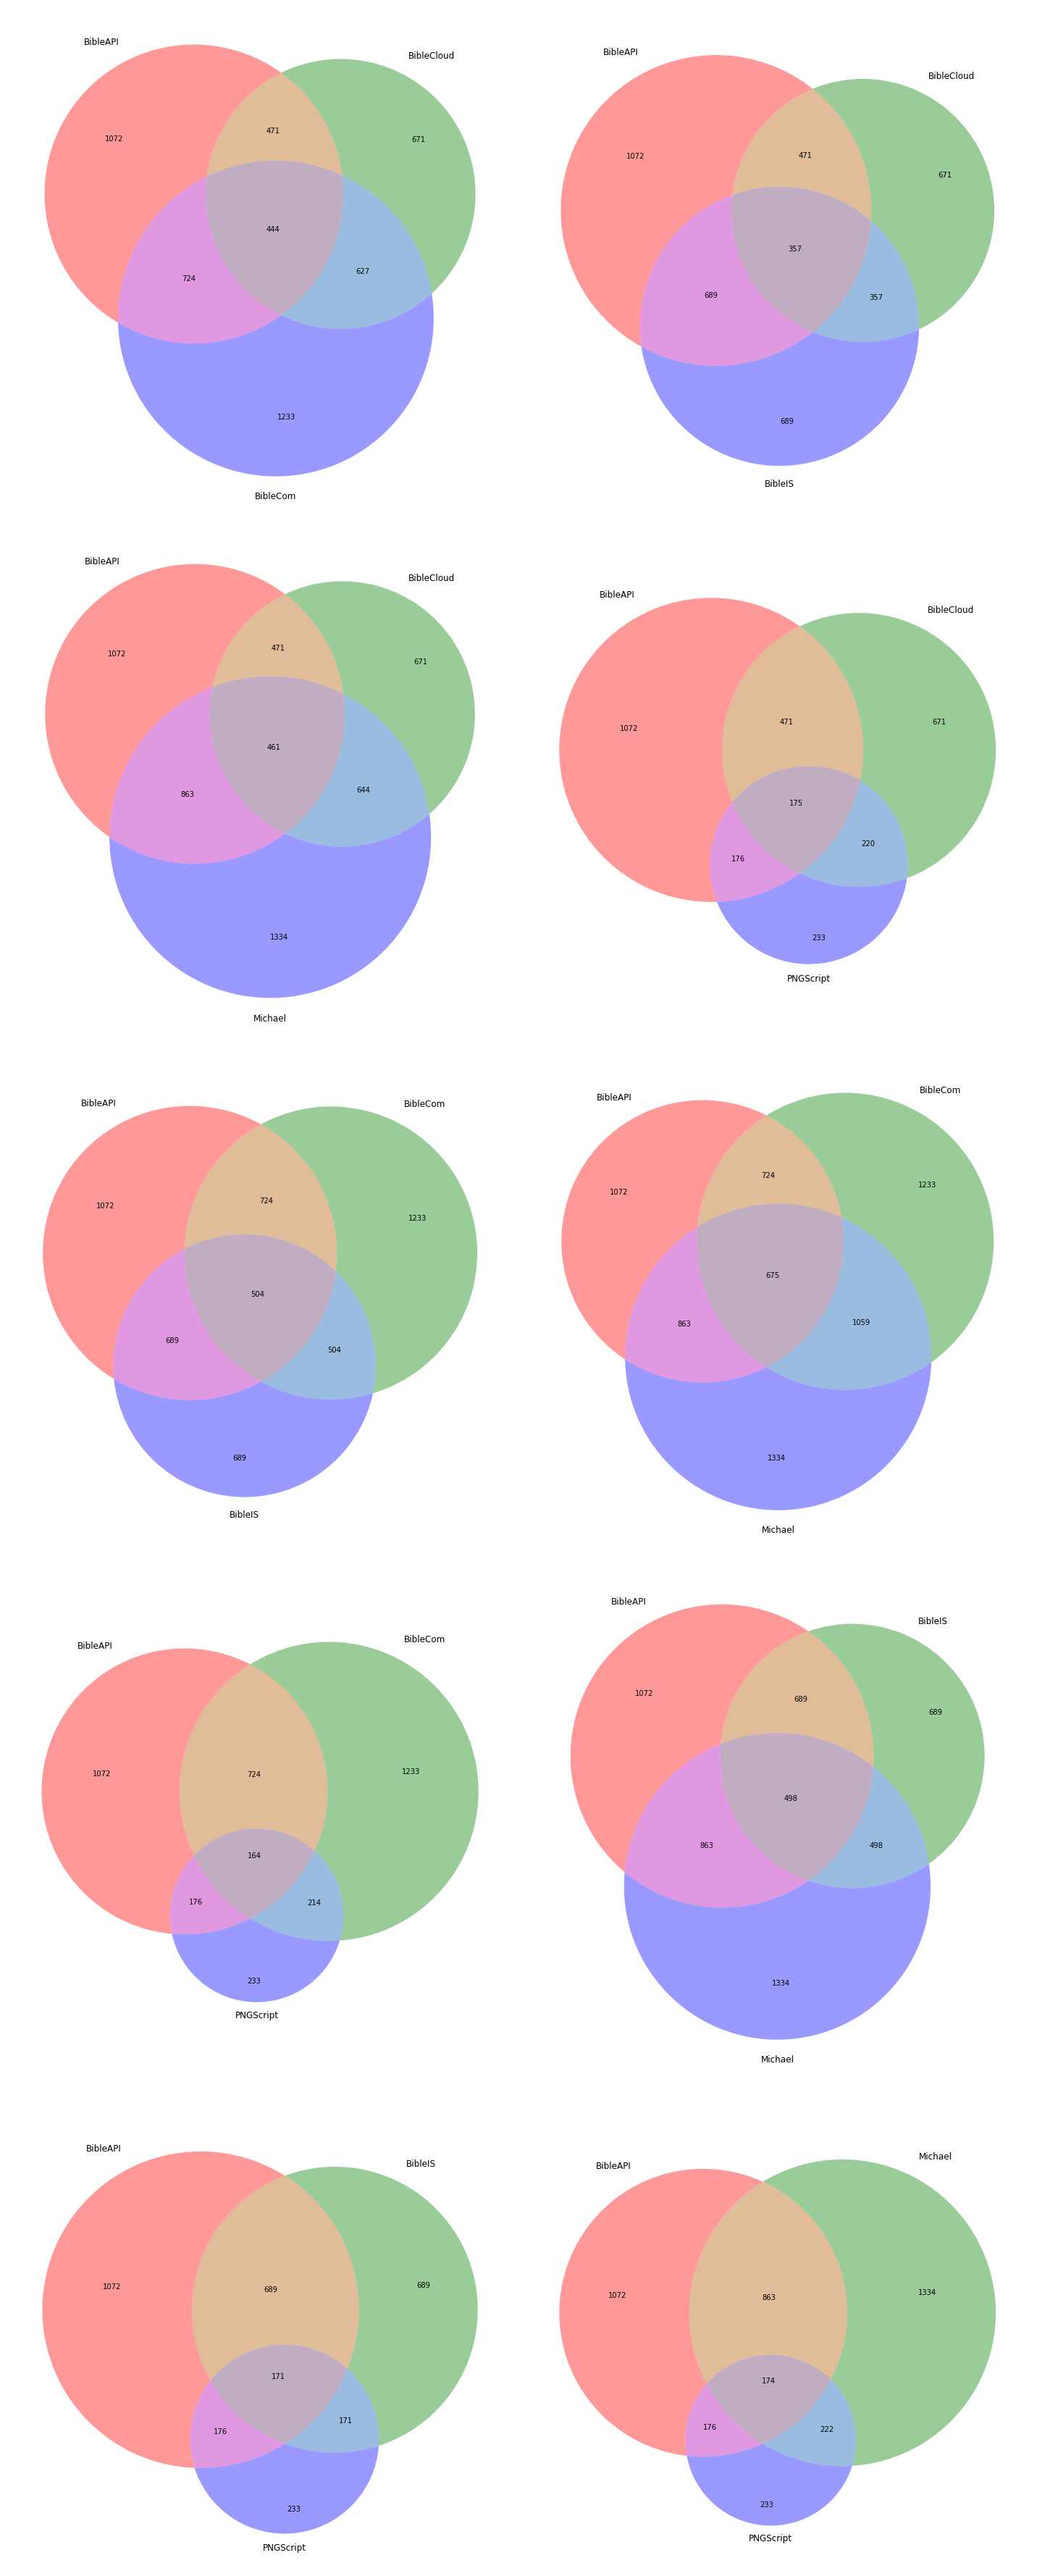

In [624]:
accum_features=methods2venn(res, 'ISO_sets')


In [581]:
iso_df=pd.read_table('/mounts/data/proj/asgari/final_proj/1000langs/wals/wals_data/ISO639-3.tsv')

In [625]:
iso_df['api']=0
iso_df['bibleis']=0
iso_df['biblecom']=0
iso_df['biblecloud']=0
iso_df['png']=0
iso_df['michael']=0

In [626]:
res={'api':isos_in_api,'michael':iso_michael,'bibleis':iso_in_bible_is,'biblecom':iso_in_bible_com,'biblecloud':iso_cloud,'png':iso_png}

for col, isos in res.items():
    for x in isos:
        iso_df[iso_df['ISO']==iso][col]=1

In [638]:
iso_df[iso_df['ISO'].isin(isos)]

,ISO,NAM_LABEL,LMP_LON,LMP_LAT,GENEALOGY,api,bibleis,biblecom,biblecloud,png,michael
6,aai,Arifama-Miniafia,149.24638,-9.15565,"Austronesian, Malayo-Polynesian, Central-Easte...",0,0,0,0,0,0
7,aak,Ankave,145.75421,-7.19444,"Trans-New Guinea, Angan, Nuclear Angan",0,0,0,0,0,0
17,aau,Abau,141.32359,-3.97222,"Sepik, Abau",0,0,0,0,0,0
21,aaz,Amarasi,123.96373,-10.21751,"Austronesian, Malayo-Polynesian, Central-Easte...",0,0,0,0,0,0
30,abi,Abidji,-4.58421,5.65656,"NAIIABTiger-Congo, Atlantic-Congo, Volta-Congo...",0,0,0,0,0,0
41,abt,Ambulas,143.05898,-3.78010,"Sepik, Ndu",0,0,0,0,0,0
45,abx,Inabaknon,124.16645,12.42636,"Austronesian, Malayo-Polynesian, Greater Barit...",0,0,0,0,0,0
46,aby,Aneme Wake,148.47891,-9.75911,"Trans-New Guinea, Southeast Papuan, Yareban",0,0,0,0,0,0
48,aca,Achagua,-72.20050,4.38649,"Maipurean, Northern, Upper Amazon, Western Naw...",0,0,0,0,0,0
50,acc,Cubulco Achí,-90.70695,15.17421,NaN,0,0,0,0,0,0


In [85]:
import requests
from bs4 import BeautifulSoup
import tqdm
import sys
sys.path.append('../')
from utility.file_utility import FileUtility

base_url = 'https://www.bible.com/versions'
soup = BeautifulSoup(requests.get(base_url).content)
# collect the game ids
collect_version_links=[]
langs=[]
url_dict=dict()
for link in tqdm.tqdm(soup.select('a[target^=_self]')):
    #soup_inner = BeautifulSoup(requests.get(link).content)
    #soup.select('a[href^=https://www.bible.com/versions/*]'):
    if 'href' in link.attrs:
        if 'versions' in link.attrs['href']:
            collect_version_links.append('https://www.bible.com'+link.attrs['href'])

for url in tqdm.tqdm(collect_version_links):
    soup_inner = BeautifulSoup(requests.get(url+'.html').content)
    for lang in soup_inner.select('h2[class^=version]'):
        for x in lang.children:
            if ('<div>' in str(x)):
                langs.append(str(x).replace('<div>','').replace('</div>',''))
    for lang in soup_inner.select("a[class^='solid-button mobile-full blue']"):
        url_dict[langs[-1]]='https://www.bible.com'+lang.attrs['href']

urls=list(url_dict.keys())
urls.sort()
FileUtility.save_list('/mounts/data/proj/asgari/final_proj/1000langs/config/extra_handled_bible.com.txt',['\t'.join([url.replace(' ','').replace('\t',''),url_dict[url]]) for url in urls])
    


100%|██████████| 3080/3080 [00:00<00:00, 801542.24it/s]

In [253]:
import requests
from bs4 import BeautifulSoup
import tqdm
import sys
sys.path.append('../')
from utility.file_utility import FileUtility

url_dict=dict()

#"https://find.bible/bibles/"
base_url = '/mounts/data/proj/asgari/final_proj/1000langs/config/all_bibles.html'
f=open(base_url,'r')
soup = BeautifulSoup(f)
crawled=[]
for link in tqdm.tqdm(soup.select('a')):
    if 'href' in link.attrs:
        if 'https://find.bible/bibles/' in link.attrs['href'] and 'https://find.bible/bibles/search' not in  link.attrs['href']:
               crawled.append((link.attrs['href'].split('/')[-1],'\t'.join([x.text for x in link.find_parent().find_parent().select('td')])))
https://find.bible/bibles
#FileUtility.save_list('/mounts/data/proj/asgari/final_proj/1000langs/config/biblis_extra.txt',['\t'.join(list(x)) for x in crawled])
#ids=[x.split()[1].split('bible.is/')[1].split('/')[0] for x in FileUtility.load_list('/mounts/data/proj/asgari/final_proj/1000langs/config/finalized_urls/bibleis.txt')]
#intersect=set(list(dict(crawled).keys())).intersection(ids)
#new_urls=[idx+'.txt\t'+'http://www.bible.is/'+idx+'/Matt/1' for idx in list(dict(crawled).keys()) if idx not in intersect]
#FileUtility.save_list('/mounts/data/proj/asgari/final_proj/1000langs/config/biblis_extra_urls.txt',new_urls)



100%|██████████| 3422/3422 [00:00<00:00, 9405.19it/s]

In [265]:
crawled[0]

('KUDBTA', "'Auhelawa\t2008 Edition\t\tkud\t\tPapua New Guinea")

In [2]:
import requests
from bs4 import BeautifulSoup
import tqdm
import sys
sys.path.append('../')
from utility.file_utility import FileUtility



base_url = 'https://bible.cloud/inscript/content/texts/'
soup = BeautifulSoup(requests.get(base_url).content)

# collect the game ids
collect_version_links=[]
langs=[]
url_dict=dict()
mapping=dict()
for link in tqdm.tqdm(soup.select('a')):
    #soup_inner = BeautifulSoup(requests.get(link).content)
    #soup.select('a[href^=https://www.bible.com/versions/*]'):
    if 'class' in link.attrs:
        if len(link.contents)==1:
            if 'href' in link.attrs:
                url_dict[link.contents[0].replace(' ','-')]='https://bible.cloud/inscript/content/texts/'+link.attrs['href'].replace('index.html','MT1.html')
                mapping[link.attrs['href'].split('/')[0]]='https://bible.cloud/inscript/content/texts/'+link.attrs['href'].replace('index.html','MT1.html')

100%|██████████| 1581/1581 [00:00<00:00, 485375.10it/s]


In [4]:
url_dictSPNR09https://bible.cloud/inscript/content/texts/SPNR09/MT1.html

{"'Abi'uai-Apa'uana-Mahamahana": 'https://bible.cloud/inscript/content/texts/RROPNG/MT1.html',
 "'Re-ĩhâimana-u'âsi-mono-zadawa-wasu'u": 'https://bible.cloud/inscript/content/texts/XAVTBL/MT1.html',
 "'Én-la̱-Nainá-xi-kjoa̱-ts'e̱-Jesucristo": 'https://bible.cloud/inscript/content/texts/MAASJV/MT1.html',
 'A-BUK-TABU-A-MAULANA-KUNUBU-ma-A-KALAMANA-KUNUBU': 'https://bible.cloud/inscript/content/texts/KSDPNG/MT1.html',
 "A-Ch'an-Biblia-D'a-Chuj-San-Mateo": 'https://bible.cloud/inscript/content/texts/CACWBT/MT1.html',
 'A-Nitana-Vure': 'https://bible.cloud/inscript/content/texts/BNPWBT/MT1.html',
 'A-SLURLKA-AA-LANGINKA-AMA-IAMESKA': 'https://bible.cloud/inscript/content/texts/BYXPNG/MT1.html',
 'A-quet-u-tʼʌnoʼ-a-ricʼbenoʼ': 'https://bible.cloud/inscript/content/texts/LACTBL/MT1.html',
 "ACH'-TESTAMENTO": 'https://bible.cloud/inscript/content/texts/TZOTZE/MT1.html',
 'AIREPA-VAE-REO-OVOI': 'https://bible.cloud/inscript/content/texts/ROOTBL/MT1.html',
 'AKUS-RO-NA-PALATUNG-TANGINANG-ANI-IE

In [493]:
iso_cloud=set([df[df['code']==x]['iso'].tolist()[0] for x in list(mapping.keys()) if len(df[df['code']==x]['iso'].tolist())>0])

In [494]:
iso_cloud_not_found=set([x for x in list(mapping.keys()) if len(df[df['code']==x]['iso'].tolist())==0])

In [498]:
iso_cloud_not_found


{'AAZUBB',
 'ABTMAP',
 'ABTWOS',
 'ACRWBT',
 'ADZPNG',
 'AFRA53',
 'AGMPNG',
 'AGRWBT',
 'AIIABT',
 'ALQCBS',
 'AMHAMH',
 'AMMTBL',
 'AMNANA',
 'AMUWBT',
 'AOJTBL',
 'AOMTBL',
 'AONWBT',
 'APEBWB',
 'APUWBT',
 'APWWBT',
 'APZPNG',
 'ARAWTC',
 'ARPABS',
 'ARZNAV',
 'ARZVDV',
 'ATGWBT',
 'ATTWBT',
 'AUYTBL',
 'AZBBSA',
 'BBASIM',
 'BBBTBL',
 'BCHPNG',
 'BCLMBB',
 'BCLMBC',
 'BEABFB',
 'BHGWBT',
 'BIGTBL',
 'BJVWBT',
 'BKXUBB',
 'BNGWTC',
 'BOJPNG',
 'BPRWBT',
 'BPSWBT',
 'BREBRG',
 'BYRPNG',
 'BYXPNG',
 'BZJWBT',
 'CACWBT',
 'CAKSWY',
 'CAKWES',
 'CARWBT',
 'CBIWBT',
 'CBTWBT',
 'CBVWBT',
 'CEBAB1',
 'CEBMBC',
 'CEBMBP',
 'CGCWBT',
 'CHAPGA',
 'CHNCU1',
 'CHNCUV',
 'CHNNCS',
 'CHNNCT',
 'CHNWTS',
 'CHQWBT',
 'CLUWBT',
 'CNLTBL',
 'COPBHC',
 'COPCNT',
 'CRXWBT',
 'CTAWBT',
 'CTPWBT',
 'CUXWBT',
 'CYAWBT',
 'DIKWBT',
 'DOPSIM',
 'ENGERV',
 'ENGHCS',
 'FRELSG',
 'GERL12',
 'GLKWBT',
 'GO1TBL',
 'GRCTIS',
 'GVCWBT',
 'GYRWBT',
 'HAW868',
 'HBOWLC',
 'HILAB2',
 'HILMBB',
 'HILMBC',
 'HNDWTC',

In [425]:
response = requests.get('http://dbt.io/library/book?key=f03a423aad95120f8eb40005070f19e9&dam_id=ACCNNT&v=2')

In [430]:
response.content==b'[]'

True

In [410]:
exists_or_not.count(True)

1822

In [423]:
response = requests.get('http://dbt.io/library/verse?key=f03a423aad95120f8eb40005070f19e9&dam_id='+'MADIBSO2ET'+'&v=2')

In [ ]:
http://dbt.io/library/verse?key=f03a423aad95120f8eb40005070f19e9&dam_id=PESTPVN2ET&v=2

In [405]:
import json
import requests


# Make a get request to get the latest position of the international space station from the opennotify api.
response = requests.get('http://dbt.io/library/book?key=f03a423aad95120f8eb40005070f19e9&dam_id=PESTPV&v=2')

# Print the status code of the response.
print(response.status_code)


400


In [396]:
files=FileUtility.recursive_glob('/mounts/data/proj/asgari/final_proj/000_datasets/testbib/biblecloud_extra/txt_files','*')

for file in tqdm.tqdm(files):
    try:
        content=FileUtility.load_list(file)
        FileUtility.save_list('/'.join((file.split('/')[0:-1]))+'/'+mapping[file.split('/')[-1]]+'.txt',content)
        FileUtility.remove(file)
    except:
        print (file, ' not successful')







  0%|          | 0/768 [00:00<?, ?it/s]





  1%|          | 6/768 [00:00<00:18, 41.40it/s]





  1%|          | 9/768 [00:00<00:22, 33.37it/s]





  2%|▏         | 12/768 [00:00<00:24, 31.27it/s]





  2%|▏         | 16/768 [00:00<00:23, 31.46it/s]





  2%|▏         | 19/768 [00:00<00:24, 30.05it/s]





  3%|▎         | 23/768 [00:00<00:24, 30.37it/s]





  4%|▍         | 31/768 [00:00<00:21, 34.91it/s]





  5%|▍         | 35/768 [00:01<00:21, 34.30it/s]





  5%|▌         | 39/768 [00:01<00:22, 31.84it/s]





  6%|▌         | 43/768 [00:01<00:23, 30.80it/s]





  6%|▌         | 47/768 [00:01<00:23, 30.91it/s]





  7%|▋         | 52/768 [00:01<00:22, 32.02it/s]





  7%|▋         | 56/768 [00:01<00:21, 32.47it/s]





  8%|▊         | 60/768 [00:01<00:22, 31.81it/s]





  8%|▊         | 64/768 [00:01<00:21, 32.04it/s]





  9%|▉         | 69/768 [00:02<00:21, 32.66it/s]





 10%|▉         | 76/768 [00:02<00:20, 34.33it/s]





 11%|█         | 81/768 [00:02<00

 69%|██████▉   | 529/768 [00:43<00:19, 12.28it/s]





 69%|██████▉   | 531/768 [00:43<00:19, 12.25it/s]





 69%|██████▉   | 532/768 [00:43<00:19, 12.23it/s]





 69%|██████▉   | 533/768 [00:43<00:19, 12.19it/s]





 70%|██████▉   | 535/768 [00:43<00:19, 12.17it/s]





 70%|██████▉   | 536/768 [00:44<00:19, 12.13it/s]





 70%|██████▉   | 537/768 [00:44<00:19, 12.09it/s]





 70%|███████   | 538/768 [00:44<00:19, 12.06it/s]





 70%|███████   | 539/768 [00:44<00:19, 12.02it/s]





 70%|███████   | 540/768 [00:45<00:19, 11.99it/s]





 70%|███████   | 541/768 [00:45<00:18, 11.95it/s]





 71%|███████   | 544/768 [00:45<00:18, 11.99it/s]





 71%|███████   | 546/768 [00:45<00:18, 11.92it/s]





 71%|███████   | 547/768 [00:46<00:18, 11.89it/s]





 72%|███████▏  | 550/768 [00:46<00:18, 11.89it/s]





 72%|███████▏  | 551/768 [00:46<00:18, 11.85it/s]





 72%|███████▏  | 552/768 [00:46<00:18, 11.81it/s]





 72%|███████▏  | 553/768 [00:46<00:18, 11.77it/s]





 72%|█████

/mounts/data/proj/asgari/final_proj/000_datasets/testbib/biblecloud_extra/txt_files/Abi'uai-Apa'uana-Mahamahana  not successful








 88%|████████▊ | 674/768 [01:03<00:08, 10.61it/s]





 88%|████████▊ | 675/768 [01:03<00:08, 10.60it/s]





 88%|████████▊ | 677/768 [01:03<00:08, 10.59it/s]





 88%|████████▊ | 678/768 [01:04<00:08, 10.58it/s]





 89%|████████▊ | 680/768 [01:04<00:08, 10.59it/s]





 89%|████████▊ | 681/768 [01:04<00:08, 10.58it/s]





 89%|████████▉ | 682/768 [01:04<00:08, 10.57it/s]





 89%|████████▉ | 683/768 [01:04<00:08, 10.56it/s]





 89%|████████▉ | 684/768 [01:04<00:07, 10.55it/s]





 89%|████████▉ | 685/768 [01:05<00:07, 10.54it/s]





 89%|████████▉ | 686/768 [01:05<00:07, 10.53it/s]





 89%|████████▉ | 687/768 [01:05<00:07, 10.52it/s]





 90%|████████▉ | 688/768 [01:05<00:07, 10.51it/s]





 90%|████████▉ | 689/768 [01:05<00:07, 10.49it/s]





 90%|████████▉ | 690/768 [01:05<00:07, 10.48it/s]





 90%|████████▉ | 691/768 [01:05<00:07, 10.47it/s]





 90%|█████████ | 692/768 [01:06<00:07, 10.46it/s]





 90%|█████████ | 693/768 [01:06<00:07, 10.44it/s]





 90%

/mounts/data/proj/asgari/final_proj/000_datasets/testbib/biblecloud_extra/txt_files/Én-la̱-Nainá-xi-kjoa̱-ts'e̱-Jesucristo  not successful








 94%|█████████▍| 724/768 [01:11<00:04, 10.18it/s]





 95%|█████████▍| 726/768 [01:11<00:04, 10.18it/s]





 95%|█████████▍| 727/768 [01:11<00:04, 10.18it/s]





 95%|█████████▍| 728/768 [01:11<00:03, 10.17it/s]





 95%|█████████▍| 729/768 [01:11<00:03, 10.15it/s]





 95%|█████████▌| 732/768 [01:11<00:03, 10.17it/s]

/mounts/data/proj/asgari/final_proj/000_datasets/testbib/biblecloud_extra/txt_files/Re-ĩhâimana-u'âsi-mono-zadawa-wasu'u  not successful








 95%|█████████▌| 733/768 [01:12<00:03, 10.16it/s]





 96%|█████████▌| 734/768 [01:12<00:03, 10.15it/s]





 96%|█████████▌| 735/768 [01:12<00:03, 10.14it/s]





 96%|█████████▌| 737/768 [01:12<00:03, 10.14it/s]





 96%|█████████▌| 738/768 [01:12<00:02, 10.14it/s]





 96%|█████████▌| 739/768 [01:12<00:02, 10.13it/s]





 96%|█████████▋| 741/768 [01:13<00:02, 10.13it/s]





 97%|█████████▋| 742/768 [01:13<00:02, 10.13it/s]





 97%|█████████▋| 743/768 [01:13<00:02, 10.12it/s]





 97%|█████████▋| 744/768 [01:13<00:02, 10.11it/s]





 97%|█████████▋| 745/768 [01:13<00:02, 10.10it/s]





 97%|█████████▋| 747/768 [01:13<00:02, 10.11it/s]





 98%|█████████▊| 749/768 [01:14<00:01, 10.12it/s]





 98%|█████████▊| 751/768 [01:14<00:01, 10.12it/s]





 98%|█████████▊| 754/768 [01:14<00:01, 10.14it/s]





 98%|█████████▊| 756/768 [01:14<00:01, 10.12it/s]





 99%|█████████▊| 758/768 [01:14<00:00, 10.11it/s]





 99%|█████████▉| 759/768 [01:15<00:00, 10.10it/s]





 99%

In [387]:
url_dict

{"'Abi'uai-Apa'uana-Mahamahana": 'https://bible.cloud/inscript/content/texts/RROPNG/MT1.html',
 "'Re-ĩhâimana-u'âsi-mono-zadawa-wasu'u": 'https://bible.cloud/inscript/content/texts/XAVTBL/MT1.html',
 "'Én-la̱-Nainá-xi-kjoa̱-ts'e̱-Jesucristo": 'https://bible.cloud/inscript/content/texts/MAASJV/MT1.html',
 'A-BUK-TABU-A-MAULANA-KUNUBU-ma-A-KALAMANA-KUNUBU': 'https://bible.cloud/inscript/content/texts/KSDPNG/MT1.html',
 "A-Ch'an-Biblia-D'a-Chuj-San-Mateo": 'https://bible.cloud/inscript/content/texts/CACWBT/MT1.html',
 'A-Nitana-Vure': 'https://bible.cloud/inscript/content/texts/BNPWBT/MT1.html',
 'A-SLURLKA-AA-LANGINKA-AMA-IAMESKA': 'https://bible.cloud/inscript/content/texts/BYXPNG/MT1.html',
 'A-quet-u-tʼʌnoʼ-a-ricʼbenoʼ': 'https://bible.cloud/inscript/content/texts/LACTBL/MT1.html',
 "ACH'-TESTAMENTO": 'https://bible.cloud/inscript/content/texts/TZOTZE/MT1.html',
 'AIREPA-VAE-REO-OVOI': 'https://bible.cloud/inscript/content/texts/ROOTBL/MT1.html',
 'AKUS-RO-NA-PALATUNG-TANGINANG-ANI-IE

In [ ]:

urls=list(url_dict.keys())
urls.sort()
FileUtility.save_list('/mounts/data/proj/asgari/final_proj/1000langs/config/extra_handled_bible.cloud.txt',['\t'.join([url.replace(' ','').replace('\t',''),url_dict[url]]) for url in urls])


In [108]:
urls=list(url_dict.keys())
urls.sort()
FileUtility.save_list('/mounts/data/proj/asgari/final_proj/1000langs/config/extra_handled_bible.cloud.txt',['\t'.join([url.replace(' ','').replace('\t',''),url_dict[url]]) for url in urls])


In [ ]:

for url in tqdm.tqdm(collect_version_links):
    soup_inner = BeautifulSoup(requests.get(url+'.html').content)
    for lang in soup_inner.select('h2[class^=version]'):
        for x in lang.children:
            if ('<div>' in str(x)):
                langs.append(str(x).replace('<div>','').replace('</div>',''))
    for lang in soup_inner.select("a[class^='solid-button mobile-full blue']"):
        url_dict[langs[-1]]='https://www.bible.com'+lang.attrs['href']

urls=list(url_dict.keys())
urls.sort()
FileUtility.save_list('/mounts/data/proj/asgari/final_proj/1000langs/config/extra_handled_bible.com.txt',['\t'.join([url.replace(' ','').replace('\t',''),url_dict[url]]) for url in urls])
    

In [192]:
seen_url=[x.split()[1] for x in FileUtility.load_list('/mounts/data/proj/asgari/final_proj/1000langs/config/finalized_urls/pngscriptures.txt')]

In [194]:
all_urls=[x.split()[1] for x in FileUtility.load_list('/mounts/data/proj/asgari/final_proj/1000langs/config/extra_handled_pngscriptures.txt')]

In [200]:
new=list(set(all_urls)-set(all_urls).intersection(seen_url))

In [201]:
all_urls=[x for x in FileUtility.load_list('/mounts/data/proj/asgari/final_proj/1000langs/config/extra_handled_pngscriptures.txt') if x.split()[1] in new]

In [203]:
FileUtility.save_list('/mounts/data/proj/asgari/final_proj/1000langs/config/pngscriptures_etxra.txt',all_urls)

In [312]:
1

1

## Bible.com

In [376]:
import requests
from bs4 import BeautifulSoup
import tqdm
import sys
sys.path.append('../')
from utility.file_utility import FileUtility
import pandas as pd

def get_metadata(node):
    iso=''
    description=''
    for x in node.parent.parent.parent.select("a[class^='lang_title']"):
        iso=x['href'].split('/')[-1]
    description=' '.join(node.parent.select('a')[0]['href'].split('/')[-1].split('-')[1::])
    num=node.parent.select('a')[0]['href'].split('/')[-1].split('-')[0]
    return iso, description, num

base_url = 'https://www.bible.com/versions'
soup = BeautifulSoup(requests.get(base_url).content)
# collect the game ids
collect_version_links=dict()
for link in tqdm.tqdm(soup.select('a[target^=_self]')):
    if 'href' in link.attrs:
        if 'versions' in link.attrs['href']:
            iso,descript,num=get_metadata(link)
            collect_version_links['https://www.bible.com'+link.attrs['href']]=(iso,descript,num)
            
final_list=[]
langs=[]
for url,meta in tqdm.tqdm(collect_version_links.items()):
    soup_inner = BeautifulSoup(requests.get(url+'.html').content)
    for lang in soup_inner.select('h2[class^=version]'):
        for x in lang.children:
            if ('<div>' in str(x)):
                langs.append(str(x).replace('<div>','').replace('</div>',''))
    for lang in soup_inner.select("a[class^='solid-button mobile-full blue']"):
        final_list.append(['https://www.bible.com'+lang.attrs['href']]+list(meta)+[langs[-1]])
        
df=pd.DataFrame(final_list,columns=['url','iso','description','num','language'])




  0%|          | 0/3079 [00:00<?, ?it/s]


 32%|███▏      | 972/3079 [00:00<00:00, 9660.26it/s]


 70%|███████   | 2159/3079 [00:00<00:00, 10748.57it/s]


100%|██████████| 3079/3079 [00:00<00:00, 11048.51it/s]


  0%|          | 0/1798 [00:00<?, ?it/s]


  0%|          | 1/1798 [00:01<34:20,  1.15s/it]


  0%|          | 2/1798 [00:02<33:42,  1.13s/it]


  0%|          | 3/1798 [00:03<33:18,  1.11s/it]


  0%|          | 4/1798 [00:04<33:11,  1.11s/it]


  0%|          | 5/1798 [00:05<33:25,  1.12s/it]


  0%|          | 6/1798 [00:06<32:58,  1.10s/it]


  0%|          | 7/1798 [00:07<32:48,  1.10s/it]


  0%|          | 8/1798 [00:08<32:43,  1.10s/it]


  1%|          | 9/1798 [00:09<32:57,  1.11s/it]


  1%|          | 10/1798 [00:11<32:56,  1.11s/it]


  1%|          | 11/1798 [00:12<32:53,  1.10s/it]


  1%|          | 12/1798 [00:13<32:45,  1.10s/it]


  1%|          | 13/1798 [00:14<32:32,  1.09s/it]


  1%|          | 14/1798 [00:15<32:31,  1.09s/it]


  1%|          | 15/179

  7%|▋         | 130/1798 [02:32<32:32,  1.17s/it]


  7%|▋         | 131/1798 [02:33<32:29,  1.17s/it]


  7%|▋         | 132/1798 [02:34<32:26,  1.17s/it]


  7%|▋         | 133/1798 [02:35<32:27,  1.17s/it]


  7%|▋         | 134/1798 [02:36<32:26,  1.17s/it]


  8%|▊         | 135/1798 [02:37<32:23,  1.17s/it]


  8%|▊         | 136/1798 [02:39<32:31,  1.17s/it]


  8%|▊         | 137/1798 [02:40<32:28,  1.17s/it]


  8%|▊         | 138/1798 [02:41<32:26,  1.17s/it]


  8%|▊         | 139/1798 [02:43<32:33,  1.18s/it]


  8%|▊         | 140/1798 [02:44<32:30,  1.18s/it]


  8%|▊         | 141/1798 [02:45<32:27,  1.18s/it]


  8%|▊         | 142/1798 [02:46<32:25,  1.17s/it]


  8%|▊         | 143/1798 [02:47<32:23,  1.17s/it]


  8%|▊         | 144/1798 [02:49<32:21,  1.17s/it]


  8%|▊         | 145/1798 [02:50<32:25,  1.18s/it]


  8%|▊         | 146/1798 [02:51<32:22,  1.18s/it]


  8%|▊         | 147/1798 [02:52<32:20,  1.18s/it]


  8%|▊         | 148/1798 [02:53<32:17,  1.17s

 22%|██▏       | 394/1798 [08:00<28:33,  1.22s/it]


 22%|██▏       | 395/1798 [08:01<28:31,  1.22s/it]


 22%|██▏       | 396/1798 [08:03<28:30,  1.22s/it]


 22%|██▏       | 397/1798 [08:04<28:29,  1.22s/it]


 22%|██▏       | 398/1798 [08:05<28:27,  1.22s/it]


 22%|██▏       | 399/1798 [08:06<28:25,  1.22s/it]


 22%|██▏       | 400/1798 [08:07<28:23,  1.22s/it]


 22%|██▏       | 401/1798 [08:08<28:21,  1.22s/it]


 22%|██▏       | 402/1798 [08:09<28:20,  1.22s/it]


 22%|██▏       | 403/1798 [08:10<28:18,  1.22s/it]


 22%|██▏       | 404/1798 [08:11<28:17,  1.22s/it]


 23%|██▎       | 405/1798 [08:12<28:15,  1.22s/it]


 23%|██▎       | 406/1798 [08:14<28:13,  1.22s/it]


 23%|██▎       | 407/1798 [08:15<28:12,  1.22s/it]


 23%|██▎       | 408/1798 [08:16<28:10,  1.22s/it]


 23%|██▎       | 409/1798 [08:17<28:09,  1.22s/it]


 23%|██▎       | 410/1798 [08:18<28:07,  1.22s/it]


 23%|██▎       | 411/1798 [08:19<28:06,  1.22s/it]


 23%|██▎       | 412/1798 [08:20<28:04,  1.22s

 37%|███▋      | 658/1798 [13:12<22:53,  1.20s/it]


 37%|███▋      | 659/1798 [13:13<22:51,  1.20s/it]


 37%|███▋      | 660/1798 [13:14<22:50,  1.20s/it]


 37%|███▋      | 661/1798 [13:16<22:49,  1.20s/it]


 37%|███▋      | 662/1798 [13:17<22:47,  1.20s/it]


 37%|███▋      | 663/1798 [13:18<22:46,  1.20s/it]


 37%|███▋      | 664/1798 [13:19<22:45,  1.20s/it]


 37%|███▋      | 665/1798 [13:20<22:43,  1.20s/it]


 37%|███▋      | 666/1798 [13:21<22:42,  1.20s/it]


 37%|███▋      | 667/1798 [13:22<22:40,  1.20s/it]


 37%|███▋      | 668/1798 [13:23<22:39,  1.20s/it]


 37%|███▋      | 669/1798 [13:24<22:38,  1.20s/it]


 37%|███▋      | 670/1798 [13:25<22:36,  1.20s/it]


 37%|███▋      | 671/1798 [13:26<22:35,  1.20s/it]


 37%|███▋      | 672/1798 [13:27<22:33,  1.20s/it]


 37%|███▋      | 673/1798 [13:29<22:32,  1.20s/it]


 37%|███▋      | 674/1798 [13:30<22:31,  1.20s/it]


 38%|███▊      | 675/1798 [13:31<22:29,  1.20s/it]


 38%|███▊      | 676/1798 [13:32<22:28,  1.20s

 51%|█████▏    | 922/1798 [18:23<17:28,  1.20s/it]


 51%|█████▏    | 923/1798 [18:24<17:27,  1.20s/it]


 51%|█████▏    | 924/1798 [18:25<17:26,  1.20s/it]


 51%|█████▏    | 925/1798 [18:26<17:24,  1.20s/it]


 52%|█████▏    | 926/1798 [18:27<17:23,  1.20s/it]


 52%|█████▏    | 927/1798 [18:29<17:22,  1.20s/it]


 52%|█████▏    | 928/1798 [18:30<17:20,  1.20s/it]


 52%|█████▏    | 929/1798 [18:31<17:19,  1.20s/it]


 52%|█████▏    | 930/1798 [18:32<17:18,  1.20s/it]


 52%|█████▏    | 931/1798 [18:33<17:17,  1.20s/it]


 52%|█████▏    | 932/1798 [18:34<17:15,  1.20s/it]


 52%|█████▏    | 933/1798 [18:36<17:14,  1.20s/it]


 52%|█████▏    | 934/1798 [18:37<17:13,  1.20s/it]


 52%|█████▏    | 935/1798 [18:38<17:12,  1.20s/it]


 52%|█████▏    | 936/1798 [18:39<17:10,  1.20s/it]


 52%|█████▏    | 937/1798 [18:41<17:10,  1.20s/it]


 52%|█████▏    | 938/1798 [18:42<17:08,  1.20s/it]


 52%|█████▏    | 939/1798 [18:43<17:07,  1.20s/it]


 52%|█████▏    | 940/1798 [18:44<17:06,  1.20s

 66%|██████▌   | 1183/1798 [23:40<12:18,  1.20s/it]


 66%|██████▌   | 1184/1798 [23:41<12:17,  1.20s/it]


 66%|██████▌   | 1185/1798 [23:42<12:16,  1.20s/it]


 66%|██████▌   | 1186/1798 [23:44<12:14,  1.20s/it]


 66%|██████▌   | 1187/1798 [23:45<12:13,  1.20s/it]


 66%|██████▌   | 1188/1798 [23:46<12:12,  1.20s/it]


 66%|██████▌   | 1189/1798 [23:47<12:11,  1.20s/it]


 66%|██████▌   | 1190/1798 [23:48<12:09,  1.20s/it]


 66%|██████▌   | 1191/1798 [23:49<12:08,  1.20s/it]


 66%|██████▋   | 1192/1798 [23:50<12:07,  1.20s/it]


 66%|██████▋   | 1193/1798 [23:51<12:06,  1.20s/it]


 66%|██████▋   | 1194/1798 [23:52<12:04,  1.20s/it]


 66%|██████▋   | 1195/1798 [23:53<12:03,  1.20s/it]


 67%|██████▋   | 1196/1798 [23:54<12:02,  1.20s/it]


 67%|██████▋   | 1197/1798 [23:56<12:01,  1.20s/it]


 67%|██████▋   | 1198/1798 [23:57<11:59,  1.20s/it]


 67%|██████▋   | 1199/1798 [23:58<11:58,  1.20s/it]


 67%|██████▋   | 1200/1798 [23:59<11:57,  1.20s/it]


 67%|██████▋   | 1201/1798 [

 80%|████████  | 1443/1798 [29:00<07:08,  1.21s/it]


 80%|████████  | 1444/1798 [29:01<07:06,  1.21s/it]


 80%|████████  | 1445/1798 [29:02<07:05,  1.21s/it]


 80%|████████  | 1446/1798 [29:03<07:04,  1.21s/it]


 80%|████████  | 1447/1798 [29:04<07:03,  1.21s/it]


 81%|████████  | 1448/1798 [29:05<07:02,  1.21s/it]


 81%|████████  | 1449/1798 [29:06<07:00,  1.21s/it]


 81%|████████  | 1450/1798 [29:08<06:59,  1.21s/it]


 81%|████████  | 1451/1798 [29:09<06:58,  1.21s/it]


 81%|████████  | 1452/1798 [29:10<06:57,  1.21s/it]


 81%|████████  | 1453/1798 [29:11<06:55,  1.21s/it]


 81%|████████  | 1454/1798 [29:12<06:54,  1.21s/it]


 81%|████████  | 1455/1798 [29:13<06:53,  1.21s/it]


 81%|████████  | 1456/1798 [29:14<06:52,  1.21s/it]


 81%|████████  | 1457/1798 [29:15<06:50,  1.21s/it]


 81%|████████  | 1458/1798 [29:17<06:49,  1.21s/it]


 81%|████████  | 1459/1798 [29:18<06:48,  1.20s/it]


 81%|████████  | 1460/1798 [29:19<06:47,  1.21s/it]


 81%|████████▏ | 1461/1798 [

 95%|█████████▍| 1703/1798 [34:13<01:54,  1.21s/it]


 95%|█████████▍| 1704/1798 [34:14<01:53,  1.21s/it]


 95%|█████████▍| 1705/1798 [34:15<01:52,  1.21s/it]


 95%|█████████▍| 1706/1798 [34:16<01:50,  1.21s/it]


 95%|█████████▍| 1707/1798 [34:17<01:49,  1.21s/it]


 95%|█████████▍| 1708/1798 [34:18<01:48,  1.21s/it]


 95%|█████████▌| 1709/1798 [34:20<01:47,  1.21s/it]


 95%|█████████▌| 1710/1798 [34:21<01:46,  1.21s/it]


 95%|█████████▌| 1711/1798 [34:22<01:44,  1.21s/it]


 95%|█████████▌| 1712/1798 [34:23<01:43,  1.21s/it]


 95%|█████████▌| 1713/1798 [34:24<01:42,  1.21s/it]


 95%|█████████▌| 1714/1798 [34:25<01:41,  1.21s/it]


 95%|█████████▌| 1715/1798 [34:26<01:40,  1.21s/it]


 95%|█████████▌| 1716/1798 [34:27<01:38,  1.20s/it]


 95%|█████████▌| 1717/1798 [34:28<01:37,  1.20s/it]


 96%|█████████▌| 1718/1798 [34:29<01:36,  1.20s/it]


 96%|█████████▌| 1719/1798 [34:31<01:35,  1.20s/it]


 96%|█████████▌| 1720/1798 [34:32<01:33,  1.20s/it]


 96%|█████████▌| 1721/1798 [

In [377]:
df=pd.DataFrame(final_list,columns=['url','iso','description','num','language'])

In [382]:
df=pd.DataFrame(df, columns=['iso','language','description','num','url'])


In [367]:
def get_metadata(node):
    iso=''
    description=''
    for x in _a.parent.parent.parent.select("a[class^='lang_title']"):
        iso=x['href'].split('/')[-1]
    description=' '.join(_a.parent.select('a')[0]['href'].split('/')[-1].split('-')[1::])
    return iso, description

eng
ylt1898 youngs literal translation 3rd revision 1898
eng
wmbbe world messianic bible british edition
eng
wmb world messianic bible
eng
webbe world english bible british edition
eng
web world english bible
eng
ts2009 the scriptures 2009
eng
tpt the passion translation
eng
tlv tree of life version
eng
rv1895 revised version with apocrypha 1895
eng
rv1885 revised version 1885
eng
rsv ci revised standard version
eng
rsv revised standard version
eng
ojb orthodox jewish bible
eng
nrsv ci new revised standard version catholic interconfessional
eng
nrsv new revised standard version
eng
nmv new messianic version bible
eng
nlt new living translation
eng
nkjv new king james version
eng
nivuk new international version anglicised
eng
niv new international version
eng
nirv new international readers version
eng
net new english translation
eng
ncv new century version
eng
nasb new american standard bible
eng
nabre new american bible revised edition
eng
msg the message
eng
mp1650 metrical psalms 165

smo
rscb o le tusi paia ekalesia katoliko roma
gla
sd1992 sailm dhaibhidh 1992 ath sgrudaichte le litreachadh ur
gla
sd1826 sailm dhaibhidh 1826 le litreachadh ur 2000
gla
macgap apocripha macgriogair 1860
gla
macetn tiomnadh nuadh maceachen 1875
gla
lsn1987 laoidhean o na sgriobtaran naomha 1987
gla
gld ann an gaidhlig an latha an diugh 1986
gla
atn2017 an tiomnadh nuadh anns an eadar theangachadh ur gaidhlig 2017
gla
abig am bioball iomraidh gaidhlig 2017
gla
abg1992 am bioball gaidhlig 1992
adl
galo bsi ali niitin bsi
gmv
gmvrnt ooratha caaqo maxaafa gamoththo
gmv
gmvnt oraa chaaqo maatzaafaa gaamo
gnb
gang pathien lekhabu thiengtho
aeu
aeunt jalliq aqsivq gaolkheel daoq
pwg
pwgnt god vonana vovokaravina
wrk
wrkpo garrwa mini bible
gbr
gaw alkawali woiwoyi
nlg
nlg na rongorongo uto nina jesus christ
ghe
ghle nyaan kraar
bmk
bmk ghayavi mak
bbj
gnt ghomala new testament
gid
gdrnt gidar new testament
acd
acd genth pobthrth gebono wurubuaare gi yege mo re anyamese me wora mo
gil
knvb t

okv
okvnt god ta duru javotoho
kua
okyb ombibeli iyapuki
ndo
ondb ombiimbeli ondjapuki
otq
otqnt ar rayo nkohi jo har nhonho maxei ntongwi ar mahwifi har hai monda ne har nhomfo
ote
otent ra rayo testamento
zao
zaont diiz kuu ndyaadno yalnaban
chz
chzntps new testament and psalms in chinantec ozumacin
uzn
uzlbc uzbek bible latin
uzn
uzb mukaddas kitob
pma
pma paama bible
pma
pma tus votut en selusien ten out voum
sig
sigdblnt wiisi nyvvfalii teng ghana
pbb
pbbnnt dyus yuwe u sesa
pri
print tii pwiciri amu aamwari naa na ci
pck
paite bsi pathian laisiangthou bsi
plu
plupb uhokri gahegbetawni nukune akak sawmus
plu
plunt uhokri gannasan
pam
pmpv ing mayap a balita biblia
att
att yu bilin ni namaro nga meyannung ka apu kesu kiristu yu bagu nga taratu ni namaro su ira nga mangikatala ka apu kesu kiristu
qxh
qxhnt mushug testamento
pag
pnpv maung a balita biblia
top
topnt xasasti talaccaxlan
pap
bpkd13 beibel na papiamentu koriente 2013
pap
bpk13 beibel na papiamentu koriente 2013
prf
prfnt

aii
aii dytq hdt dmrn yshw mshyh wmzmwr blshn twry
urd_dv
dgv kitaab e mukdds
suz
suzbi prmprbhu yaave aa lov
taj
tajnt prmeshvrlaa bcn chaar kbul
nep
srl nepaalii pvitr baaibl
nep
nnrv nepali new revised version
nwx
newnt nhuugu niym naapn bhjnsngrh v hitopdesh
mar
marathi bsi pvitr shaastr rv bsi
mar
maracl bsi marathi common language nt bsi
mar
mar mraatthii baaybl
hin
shb srl hindii baaibl
hin
hinulb pvitr baaibil
hin
hindicl bsi pvitr baaibil cl bsi
hin
hindi bsi hindi ov re edited bsi
hin
hin2017 nyaa niym
hin
hhbd hindi holy bible
asm
asmfb asmiiyaa baaibel
asm
asmfb asmiiyaa baaibel
ben
sbcl pobitro baibel
ben
rovu pbitr baaibel kerii bhaarsn
ben
mbcl kitabul mukkadas
ben
bengali bsi pbitr baaibel ov bsi
ben
ben2017 baanlaa baaibel
ben
bcl pbie baaibel cl bible
ben
bacib kitaabul mokaadds
pan
pov bsi pvihtr baaiibl ov bsi
pan
panbcs pnjaabii baaiibl
pan
cl na prmeeshr dii baannii snt yuuhnnaa duaaraa likhiaa subb smaacaar
guj
gujov bsi pvitr baaibl ov bsi
guj
gujcl bsi pvitr ba

In [363]:
print(' '.join(a[1].parent.select('a')[0]['href'].split('/')[-1].split('-')[1::]))

wmbbe world messianic bible british edition


In [322]:
link

<a data-reactid="396" href="http://www.pinterest.com/youversion/" target="_self">Pinterest</a>

## Find all URLs

In [677]:
base_url = 'http://ebible.org/Scriptures/copyright.php'
soup = BeautifulSoup(requests.get(base_url).content)
# collect the game ids
tables=[]
for link in soup.select('table'):
    tables.append(pd.read_html(str(link),header=0)[0])
results=pd.concat(tables)


mask=(results['FCBH/DBS'].str.len() == 6) & (results['FCBH/DBS'].str.isupper())
df = results.loc[mask]
df['iso']=[x[0:3] for x in df['ID'].tolist()]
df=df[['iso','FCBH/DBS','Language','Language in English', 'Year','Short Title']]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [550]:
[x for x in iso_cloud_not_found if len(results[results['FCBH/DBS']==x]['ID'].tolist())==0]

['beuUBB',
 'WARAB4',
 'SPNNBL',
 'BEABFB',
 'TONPNG',
 'HILAB2',
 'ARZNAV',
 'HBOWLC',
 'COPCNT',
 'HAW868',
 'CHAPGA',
 'TGLMBP',
 'ARPABS',
 'GLKWBT',
 'CEBMBC',
 'COPBHC',
 'BREBRG',
 'HILMBC',
 'TGLMBC',
 'ILOAB3',
 'CEBMBP',
 'CHNCU1',
 'WARMBB',
 'SPNR60',
 'PESPBS',
 'BCLMBB',
 'RUSBIB',
 'PAMMBP',
 'JPNLOC',
 'SWHBIB',
 'HILMBB',
 'WARMBC',
 'FRELSG',
 'CEBAB1',
 'ILOMBB',
 'CHNCUV',
 'ENGHCS',
 'GERL12',
 'PAGMBC',
 'BCLMBC',
 'SPNR09',
 'TGLAB8',
 'ARZVDV',
 'RUSSYN',
 'PAMMBC',
 'AFRA53',
 'SWASWA',
 'GRCTIS',
 'ILOMBC',
 'PAGMBB',
 'TGLAB1']